In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [22]:
%matplotlib notebook
%matplotlib inline

In [23]:


print("python", sys.version)

python 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:00:33) 
[Clang 13.0.1 ]


In [1]:
'''e.g. of save model with pickle:
model = linear_model.LinearRegression()
model.fit(df[['area']],df.price)

Save Model To a File Using Python Pickle:
import pickle
with open('model_pickle','wb') as file:
    pickle.dump(model,file)


Load Saved Model:
with open('model_pickle','rb') as file:
    mp = pickle.load(file)


     

mp.coef_'''

"e.g. of save model with pickle:\nmodel = linear_model.LinearRegression()\nmodel.fit(df[['area']],df.price)\nSave Model To a File Using Python Pickle:\nimport pickle\nwith open('model_pickle','wb') as file:\n    pickle.dump(model,file)\nLoad Saved Model:\n\nwith open('model_pickle','rb') as file:\n    mp = pickle.load(file)\n\n\n     \n\nmp.coef_"

In [24]:
vehicles = pd.read_csv("vehicles.csv", index_col=0)

In [25]:
reduced_df = vehicles.copy()
reduced_df = reduced_df[reduced_df['price'] > 0]
reduced_df = reduced_df[reduced_df['price'].notna()]
reduced_df = reduced_df[reduced_df['price'] < 1000000]
reduced_df = reduced_df[~((reduced_df.manufacturer.isnull()) & (reduced_df.manufacturer.isnull()))]
reduced_df = reduced_df.drop(columns=[
    'county', 
    'id', 
    'region_url', 
    'url', 
    'image_url',
    'VIN'
])

In [26]:
from sklearn.model_selection import train_test_split

vehicles_train_set, vehicles_test_set = train_test_split(reduced_df, test_size=0.1, random_state=123)
vehicles_train_set, vehicles_val_set = train_test_split(vehicles_train_set, test_size=0.95)

**Note:** In the next couple of exercises we are going to continue trying to predict the price. Since we have not finished modeling, we will continue to avoid looking at the test set. Note also that in every exercise we have used `random_state=123`, so we are always making the same training/test split.

In [27]:
def preprocess(df_in):
    
    df = df_in.copy()
    
    N = 50
    topN_models = df.model.value_counts().head(N).index.to_numpy()
    df.loc[~df['model'].isin(topN_models),'model'] = 'unknown'
    top_models = list(vehicles_train_set.model.unique())
    
    df = df.drop(columns=[
        'size', 
        'drive', 
        'lat', 
        'long', 
        'posting_date', 
        'paint_color', 
        'description',
        'state',
        'region'
    ])
    
    df.loc[~df['model'].isin(top_models),'model'] = 'unknown'
    
    df = df.dropna(subset=['year', 'odometer','manufacturer'])
    df['type'].fillna('unknown',inplace=True)
    df['title_status'].fillna('clean', inplace=True)
    df['fuel'].fillna('gas', inplace=True)
    df['cylinders'].fillna('unknown', inplace=True)
    df['transmission'].fillna('automatic', inplace=True)
    df['condition'].fillna('good', inplace=True)
    
    
    X = df.drop('price', axis=1)
    y = df['price'].copy()
    
    return(X,y)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X, y = preprocess(vehicles_train_set)

num_attribs = list(X.select_dtypes('number'))
cat_attribs = list(X.select_dtypes('object'))


pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_attribs),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs)
])

X_prepared = pipeline.fit_transform(X)

### Visualizing a decision tree

In [29]:


from sklearn.tree import DecisionTreeRegressor

tree_class = DecisionTreeRegressor(max_depth=3)
tree_class.fit(X_prepared, y)

DecisionTreeRegressor(max_depth=3)

In [30]:


pipeline.transformers[1][1].fit(X.select_dtypes('object'))
all_attributes = np.concatenate((
    X.select_dtypes('number').columns.to_numpy(),
    pipeline.transformers[1][1].get_feature_names()
))

print(all_attributes)

['year' 'odometer' 'x0_acura' 'x0_alfa-romeo' 'x0_aston-martin' 'x0_audi'
 'x0_bmw' 'x0_buick' 'x0_cadillac' 'x0_chevrolet' 'x0_chrysler'
 'x0_datsun' 'x0_dodge' 'x0_ferrari' 'x0_fiat' 'x0_ford' 'x0_gmc'
 'x0_harley-davidson' 'x0_honda' 'x0_hyundai' 'x0_infiniti' 'x0_jaguar'
 'x0_jeep' 'x0_kia' 'x0_land rover' 'x0_lexus' 'x0_lincoln' 'x0_mazda'
 'x0_mercedes-benz' 'x0_mercury' 'x0_mini' 'x0_mitsubishi' 'x0_nissan'
 'x0_pontiac' 'x0_porsche' 'x0_ram' 'x0_rover' 'x0_saturn' 'x0_subaru'
 'x0_tesla' 'x0_toyota' 'x0_volkswagen' 'x0_volvo' 'x1_1500' 'x1_2500'
 'x1_3500' 'x1_4runner' 'x1_acadia' 'x1_accord' 'x1_altima' 'x1_camry'
 'x1_charger' 'x1_civic' 'x1_corolla' 'x1_corvette' 'x1_cr-v' 'x1_cruze'
 'x1_edge' 'x1_elantra' 'x1_equinox' 'x1_escape' 'x1_expedition'
 'x1_explorer' 'x1_f-150' 'x1_f-250' 'x1_f150' 'x1_focus' 'x1_forester'
 'x1_fusion' 'x1_grand caravan' 'x1_grand cherokee' 'x1_impala'
 'x1_impreza' 'x1_jetta' 'x1_malibu' 'x1_mustang' 'x1_odyssey'
 'x1_outback' 'x1_pilot' 'x1_pri

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


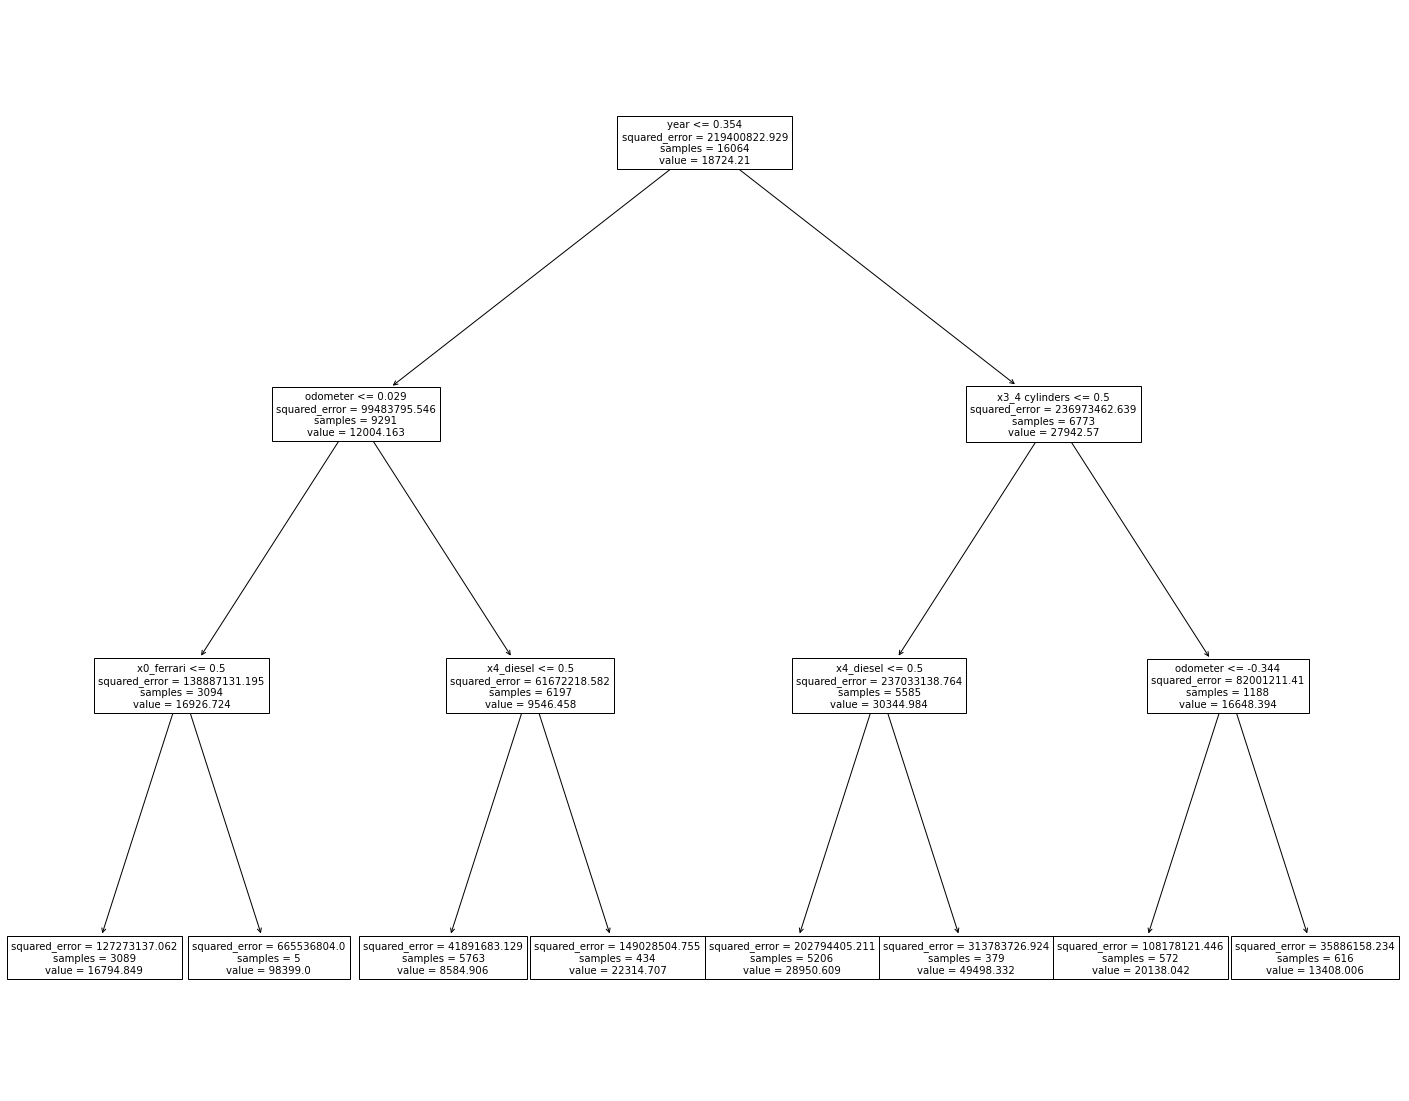

In [31]:

from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
plot_tree(tree_class, feature_names=all_attributes)
plt.show()

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf_reg = RandomForestRegressor(n_estimators=50, max_features=5)
est = rf_reg.fit(X_prepared, y)

**Task:** Plot a feature importance plot for the model using the `feature_importances_` attribute of `est`.

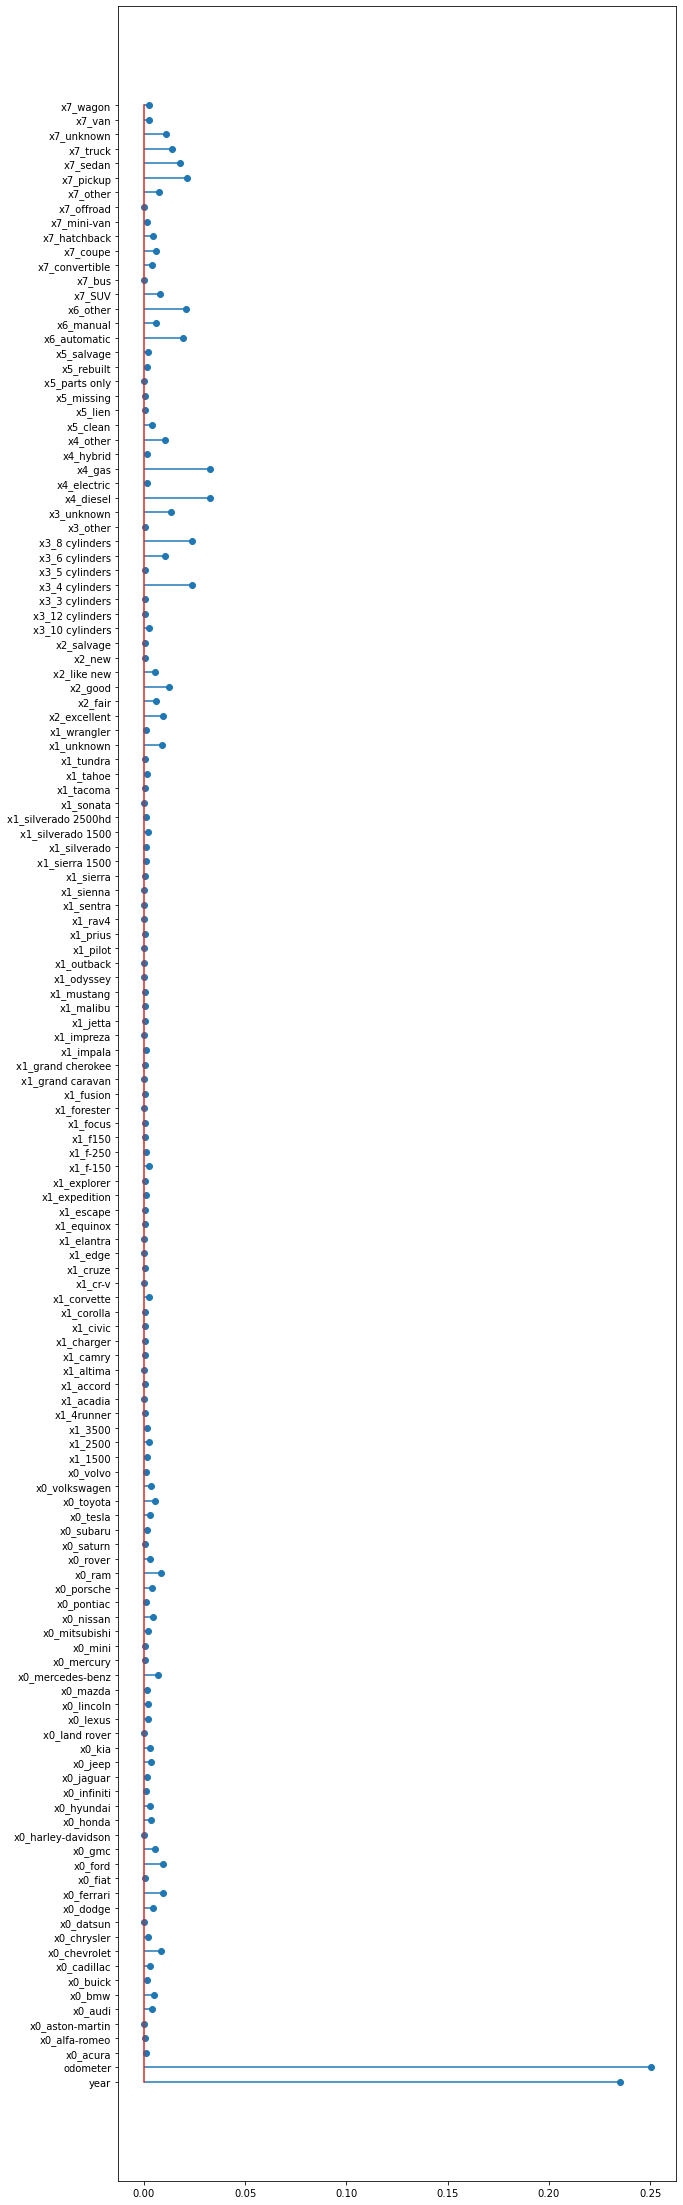

In [33]:
importances = rf_reg.feature_importances_

fig = plt.figure(figsize=(10,40))
plt.stem(all_attributes, importances, orientation="horizontal")
plt.show()

answer: 5 most important are: year, odometer, x4_gas, x4_diesel, x3_4 cylinders, x0_ferrari

**Question:** What do you find interesting about this plot? What are the five most important features according to the plot?

**Answer:** In this plot we can clearly see the importance of odometer and year as established in the previous assignment 1, followed by the high importance of x4_gas, x4_diesel, x3_4 cylinders, x0_ferrari, which can be interpreted that having a 1 in these variables means a significant change (positive or negative) in price. I.E. If a car is of type ferrari then we know it'll be significantly more expensive than the other types.

**Task:** Use `sklearn.inspection.permutation_importance` to plot a permutation feature importance plot for the model. Make sure you evaluate on the training set.

In [34]:
from sklearn.inspection import permutation_importance
perms = permutation_importance(rf_reg, X_prepared.toarray(), y, random_state=123)

print(perms.importances_mean)
print(perms.importances_std)
print(perms.importances)



[3.79080504e-01 3.06451813e-01 1.39079209e-03 7.06435714e-04
 8.95570682e-05 6.31375587e-03 9.94052160e-03 1.55364826e-03
 5.91673967e-03 2.33520174e-02 2.76307687e-03 4.57853797e-05
 6.59026122e-03 7.34043397e-03 2.25516854e-04 4.17509836e-02
 1.28623718e-02 2.49268593e-04 8.19015898e-03 4.77507917e-03
 8.57481860e-04 1.59637058e-03 8.57845775e-03 5.24623522e-03
 7.90476492e-08 3.40907001e-03 2.40668280e-03 1.63249541e-03
 1.84538997e-02 2.65697900e-04 2.93153695e-04 1.86034834e-03
 8.59493819e-03 7.44287427e-04 5.50756620e-03 1.26490856e-02
 4.28651799e-03 1.33786601e-04 2.58882409e-03 2.64821504e-03
 1.39980535e-02 4.65079942e-03 1.12075758e-03 1.32277793e-03
 2.23396756e-03 1.01405406e-03 5.63044252e-04 9.58705599e-05
 3.91067528e-04 1.71753292e-04 5.40689266e-04 6.85615389e-04
 3.02644966e-04 2.66399983e-04 3.33351820e-03 1.92440715e-04
 5.69916110e-04 2.33643149e-04 1.18512404e-04 4.15480851e-04
 6.66537205e-04 8.46785463e-04 8.24448707e-04 3.52072509e-03
 7.67576532e-04 3.241975

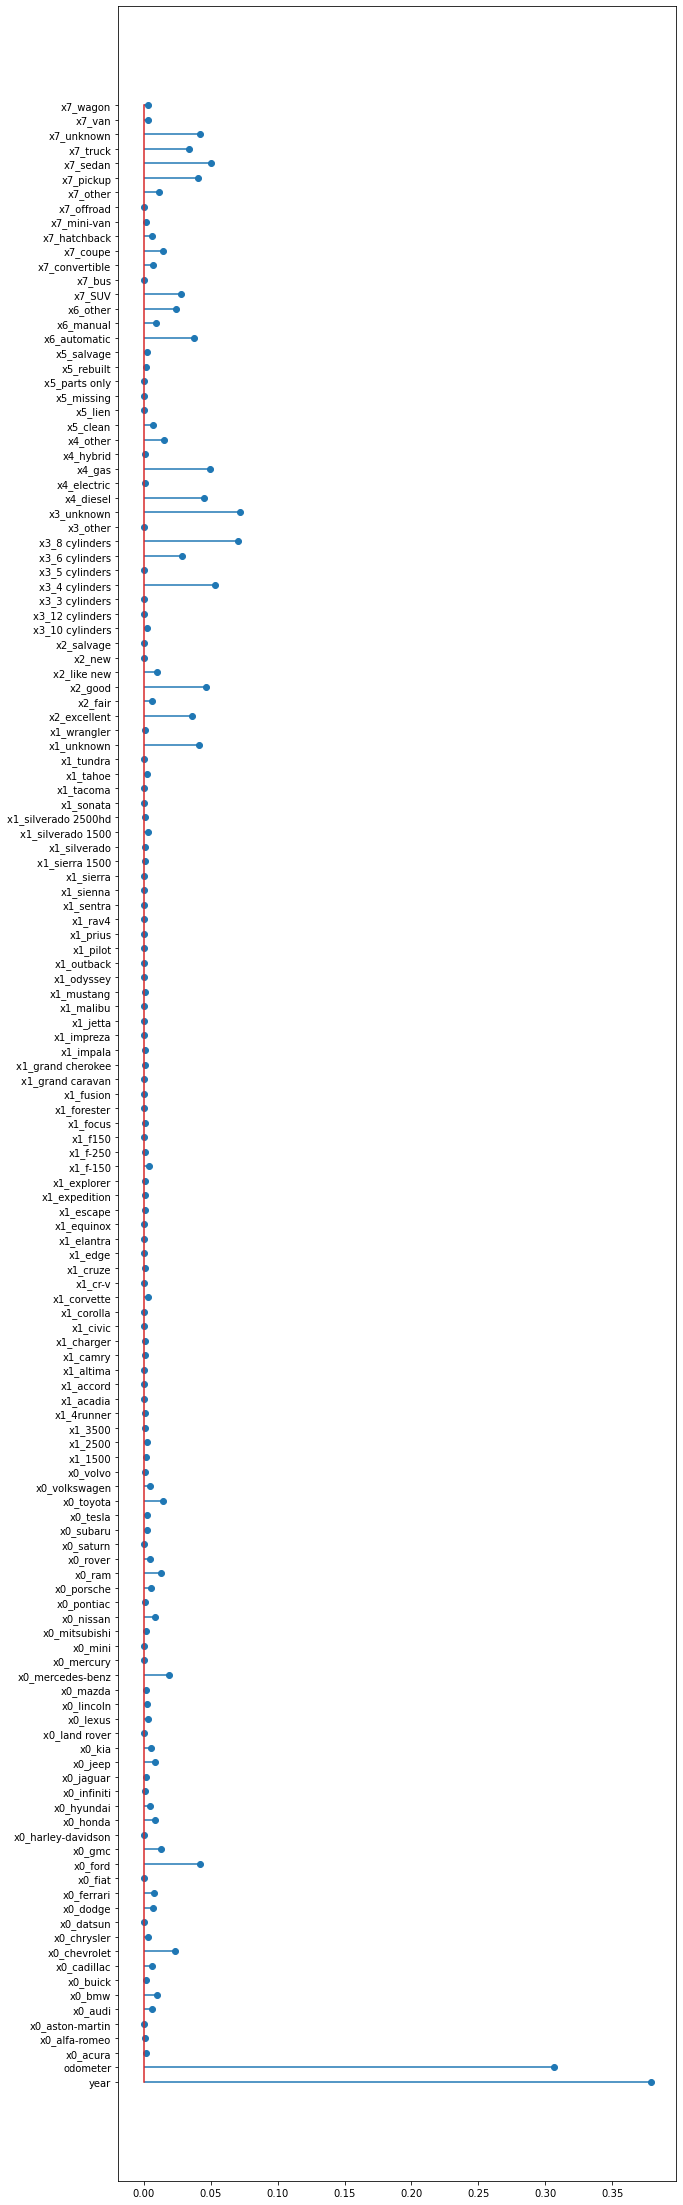

In [35]:

fig = plt.figure(figsize=(10,40))
plt.stem(all_attributes, perms.importances_mean, orientation="horizontal")
plt.show()


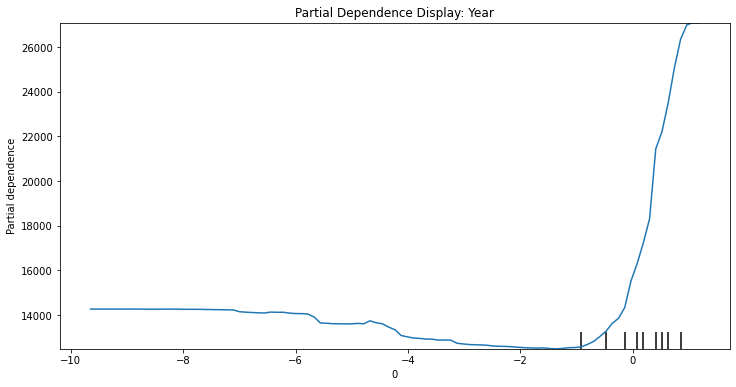

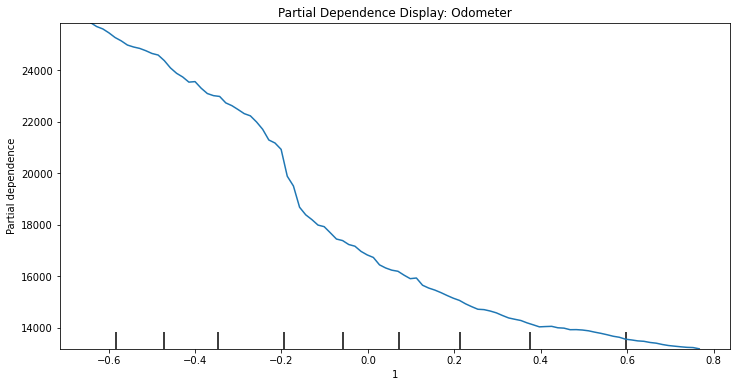

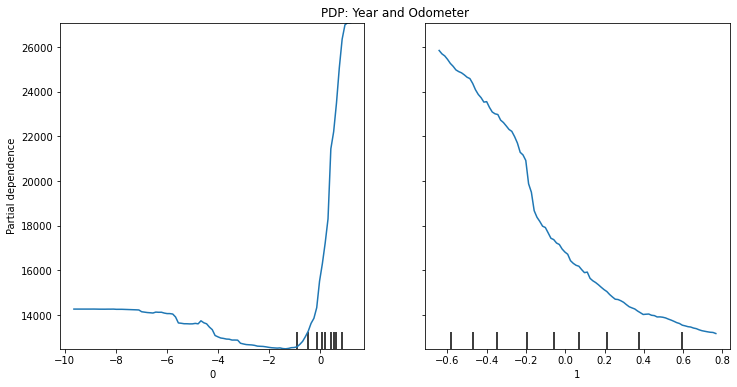

In [36]:
from sklearn.inspection import PartialDependenceDisplay
# PDP for year on price
# print(X_prepared.getcol(0))
# print(X_prepared.getcol(0)[0])
# print(X_prepared.toarray())

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_title("Partial Dependence Display: Year")
ax1.set_xlabel("Year")
ax1.set_ylabel("Price")
disp1 = PartialDependenceDisplay.from_estimator(rf_reg, X_prepared.toarray(), [0], ax=ax1)


fig, ax2 = plt.subplots(figsize=(12, 6))
ax2.set_title("Partial Dependence Display: Odometer")
ax2.set_xlabel("Odometer")
ax2.set_ylabel("Price")
disp2 = PartialDependenceDisplay.from_estimator(rf_reg, X_prepared.toarray(), [1], ax=ax2)



fig, ax3 = plt.subplots(figsize=(12, 6))
ax3.set_title("PDP: Year and Odometer")
disp3 = PartialDependenceDisplay.from_estimator(rf_reg, X_prepared.toarray(), [0, 1], ax=ax3)


Text(0, 0.5, 'Price')

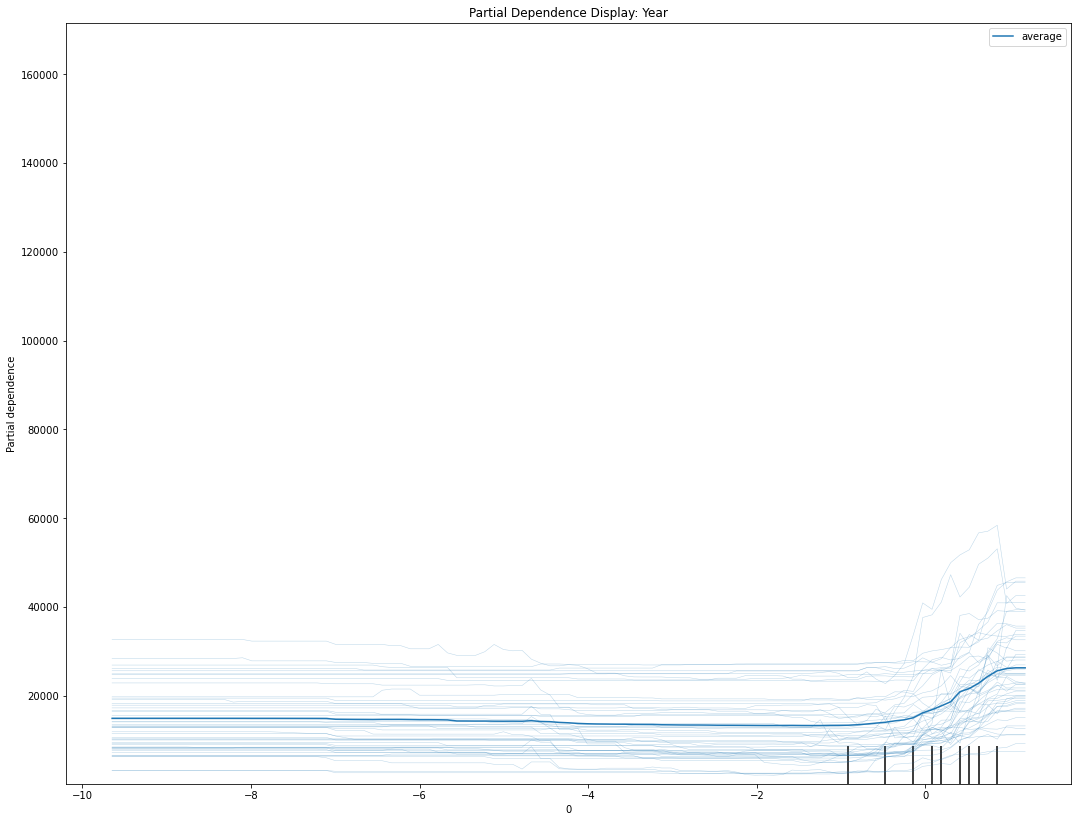

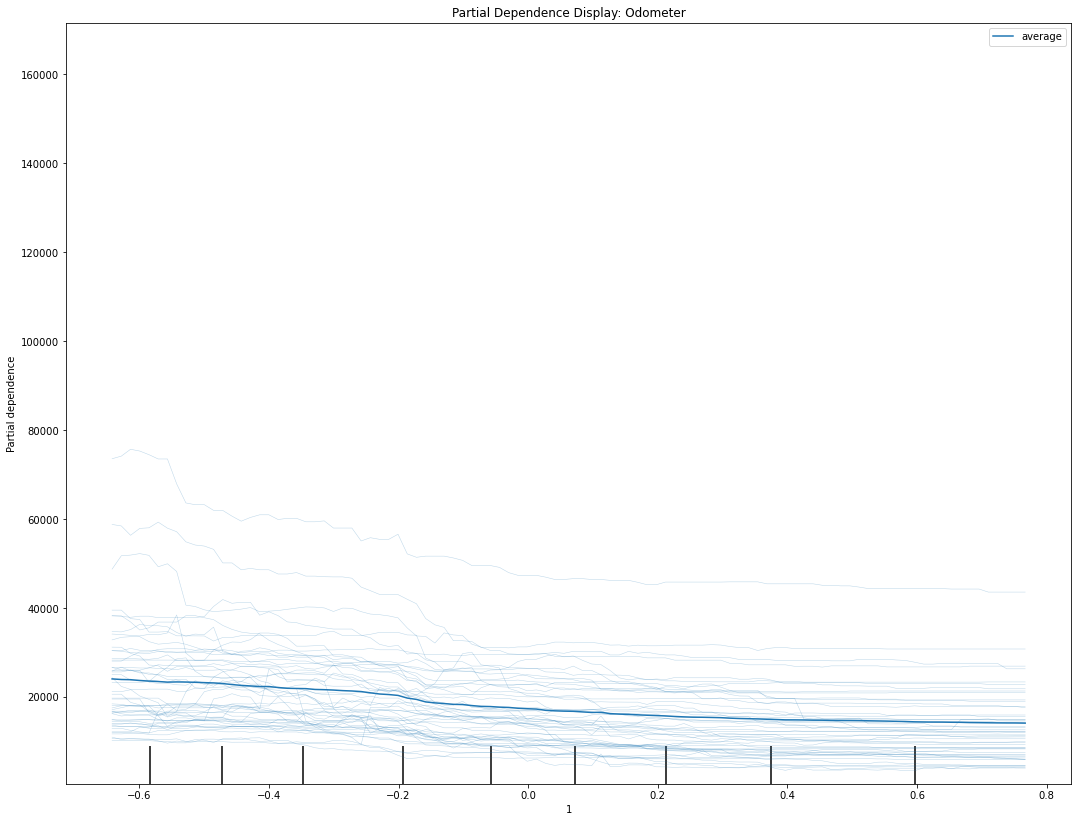

In [37]:

fig1, ax1 = plt.subplots(figsize=(18, 14))
ax1.set_title("Partial Dependence Display: Year")
ax1.set_xlabel("Year")
ax1.set_ylabel("Price")
disp1 = PartialDependenceDisplay.from_estimator(rf_reg, X_prepared.toarray(), [0], ax=ax1, kind="both",subsample=50)


fig2, ax2 = plt.subplots(figsize=(18, 14))
disp2 = PartialDependenceDisplay.from_estimator(rf_reg, X_prepared.toarray(), [1], ax=ax2, kind="both",subsample=50)
disp2.bounding_ax_.set_title("Partial Dependence Display: Odometer")
disp2.bounding_ax_.set_xlabel("Odometer")
disp2.bounding_ax_.set_ylabel("Price")




In [38]:
import lime
from lime import lime_tabular

In [39]:
explainer = lime_tabular.LimeTabularExplainer(
    X_prepared, mode="regression", feature_names=all_attributes, class_names=['price'], verbose=True)

training_data = X_prepared.toarray()
i = np.random.randint(0, training_data.shape[0])
# exp = explainer.explain_instance(training_data[i], rf_reg.predict, num_features=len(training_data[i]))
exp = explainer.explain_instance(training_data[i], rf_reg.predict, num_features=5)
exp.show_in_notebook(show_table=True)

Intercept 17171.03054374742
Prediction_local [10976.64401168]
Right: 4326.92


In [40]:
import shap


''' I could not get this to work, even training on a df, like many of the examples showed 
yielded the error: 

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you 
passed to the explainer is the same shape that the model was trained on. If your data shape 
is correct then please report this on GitHub. This check failed because for one of the samples 
the sum of the SHAP values was 41613.310316, while the model output was 39785.320000. 
If this difference is acceptable you can set check_additivity=False to disable this check.'''

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


training_df = pd.DataFrame(X_prepared.toarray(), columns=all_attributes)
rf_new_model = RandomForestRegressor(n_estimators=50, max_features=5)
est = rf_new_model.fit(training_df, y)
explainer = shap.Explainer(rf_new_model, training_df)
shap_values = explainer(training_df)
shap.plots.beeswarm(shap_values)




100%|===================| 16049/16064 [10:08<00:00]        

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 15359.562344, while the model output was 17172.600000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [41]:
msrp_df = pd.read_csv("msrp.csv")

In [42]:
for col in msrp_df.columns:
    new_col = '_'.join(col.lower().split(' '))
    msrp_df.rename({col: new_col}, inplace=True, axis=1)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [44]:
msrp_train_set, msrp_test_set = train_test_split(
    msrp_df, 
    test_size=0.3, 
    random_state=123
)
msrp_train_df = msrp_train_set.copy()

In [45]:
msrp_train_df.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4302,Infiniti,EX,2012,premium unleaded (recommended),297.0,6.0,AUTOMATIC,rear wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,24,17,190,38100
2264,GMC,Canyon,2012,regular unleaded,185.0,4.0,AUTOMATIC,four wheel drive,2.0,NaN,Compact,Regular Cab Pickup,23,17,549,22385
2373,Porsche,Cayenne,2016,premium unleaded (required),440.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,High-Performance",Midsize,4dr SUV,23,16,1715,95500
7413,Chrysler,Pacifica,2017,regular unleaded,287.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,28,18,1013,37895
6872,Lincoln,MKT,2015,regular unleaded,303.0,6.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Large,Wagon,25,17,61,43210


In [46]:
X = msrp_train_set.copy()

num_attribs = list(X.select_dtypes('number'))
cat_attribs = list(X.select_dtypes('object'))

scaler =  StandardScaler()

X_prepared = scaler.fit_transform(X.select_dtypes('number').dropna())

We also use PCA to project the data into two dimensions for visualization purposes.

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X_prepared)

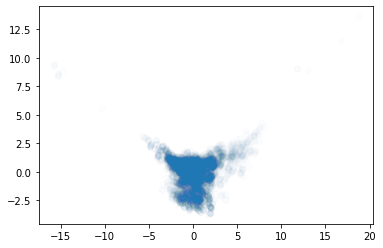

In [48]:


plt.figure()
plt.scatter(X2D[:,0],X2D[:,1], alpha=0.01)

8275
8248


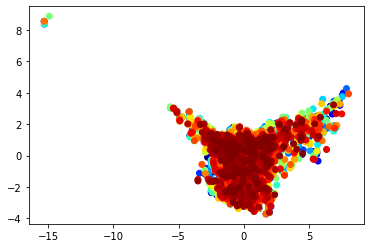

In [49]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=2).fit(X_prepared)


print(len(dbscan_model.labels_))
print(len(dbscan_model.core_sample_indices_))


X2D_dbscan = pca.transform(dbscan_model.components_)


plt.scatter(X2D_dbscan[:, 0], X2D_dbscan[:,1], c=dbscan_model.core_sample_indices_, cmap= "jet") 
plt.show() 


**Task:** Cluster the data into five clusters using KMEANS (`sklearn.cluster.KMeans`). Plot the cluster centers along with the dimensionality reduced data.

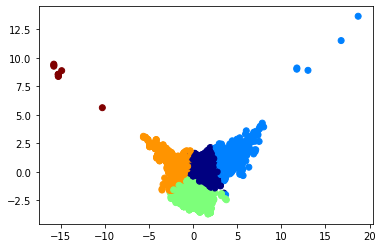

In [50]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=123).fit(X2D)

plt.scatter(X2D[:, 0], X2D[:,1], c=kmeans_model.labels_, cmap= "jet") 
plt.show() 



**Task:** Print the cluster centers.

In [51]:
print(kmeans_model.cluster_centers_)

[[  0.8976847    0.33905602]
 [  4.33793069   1.57186535]
 [ -0.02122957  -1.91412134]
 [ -1.65759992   0.56499496]
 [-14.85690294   8.49352227]]


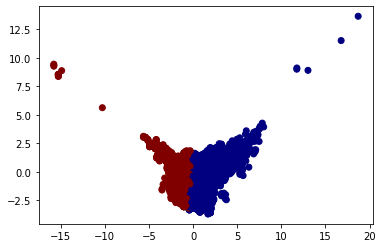

In [52]:
kmeans_model = KMeans(n_clusters=2, random_state=123).fit(X2D)
plt.scatter(X2D[:, 0], X2D[:,1], c=kmeans_model.labels_, cmap= "jet") 
plt.show() 


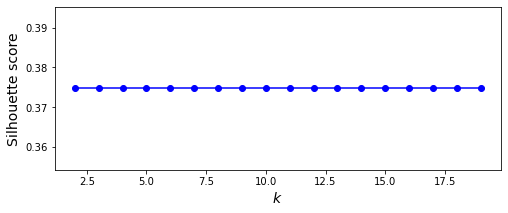

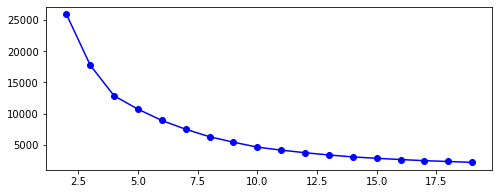

In [53]:
from sklearn.metrics import silhouette_score

k_means_model_list = []
silhouette_scores = []
inertias = []
for i in range(2,20):
    new_model = KMeans(n_clusters=i, random_state=123).fit(X2D)
    k_means_model_list.append(new_model)
    silhouette_scores.append(silhouette_score(X2D, kmeans_model.labels_))
    inertias.append(new_model.inertia_)
    # print(silhouette_score(X2D, kmeans_model.labels_))

plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)


plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), inertias, "bo-")

plt.show()
                     

Means :  [[ 3.74550459e-01  6.21670977e-01]
 [ 2.29294083e+00  3.87515717e-01]
 [-1.26247073e-02 -1.49501386e+00]
 [-1.71128450e+00  5.91550541e-01]
 [-1.48569021e+01  8.49352178e+00]]
Weights :  [0.35518825 0.12699802 0.28033222 0.23639389 0.00108761]


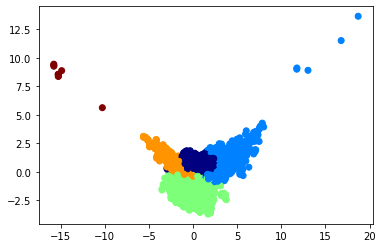

In [54]:
from sklearn.mixture import GaussianMixture

gm_model = GaussianMixture(n_components=5, n_init=10, random_state=123)
gm_model.fit(X2D)
print("Means : ", gm_model.means_)
print("Weights : ",gm_model.weights_)

predictions = gm_model.predict(X2D)

plt.scatter(X2D[:, 0], X2D[:,1], c=predictions, cmap= "jet") 
plt.show() 


In [55]:
gm_model.converged_

True

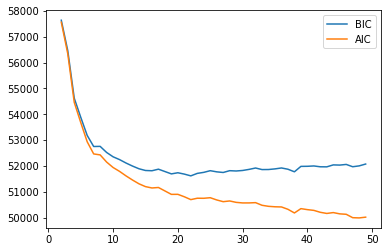

In [56]:
bic_list = []
aic_list = []

for i in range(2,50):
    gm_model_new = GaussianMixture(n_components=i, n_init=10, random_state=123)
    gm_model_new.fit(X2D)
    bic_list.append(gm_model_new.bic(X2D))
    aic_list.append(gm_model_new.aic(X2D))
    
plt.plot(range(2, 50), bic_list, label="BIC")
plt.plot(range(2, 50), aic_list, label="AIC")
plt.legend()
plt.show()


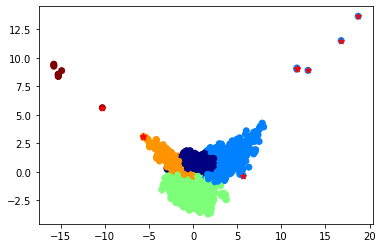

In [57]:
densities = gm_model.score_samples(X2D)
density_threshold = np.percentile(densities, 0.1)
anomalies_indexes = np.where(X2D[densities < density_threshold])
anomalies = X2D[densities < density_threshold]

predictions = gm_model.predict(X2D)

plt.scatter(X2D[:, 0], X2D[:,1], c=predictions, cmap= "jet") 
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.show()

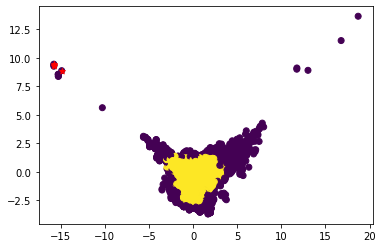

In [58]:
from sklearn.ensemble import IsolationForest
if_model = IsolationForest(n_estimators=10, random_state=123)
if_model.fit(X2D)

predictions_if = if_model.predict(X2D)

densities_if = if_model.score_samples(X2D)
density_threshold_if = np.percentile(densities_if, 0.1)
anomalies_if = X2D[densities_if < density_threshold_if]

plt.scatter(X2D[:, 0], X2D[:,1], c=predictions_if) 
plt.scatter(anomalies_if[:, 0], anomalies_if[:, 1], color='r', marker='*')
plt.show()


